# Bank Customer Churn Prediction

## Introdução e Contexto
A rotatividade de clientes, conhecida como **Churn**, é um dos principais desafios enfrentados por instituições financeiras. Este projeto tem como objetivo prever quais clientes têm maior probabilidade de deixar o banco, utilizando técnicas de machine learning. O dataset utilizado é o **Bank Customer Churn Prediction**, disponível no Kaggle, que contém informações demográficas, de produtos financeiros e de comportamento de clientes.

## Sobre o Dataset
O dataset utilizado é o Bank Customer Churn Prediction, disponível no [Kaggle](https://www.kaggle.com/competitions/problem1-bank-customer-churn-prediction/overview). Ele contém informações demográficas, de produtos financeiros e de comportamento de clientes de um banco. As variáveis incluem:

- **Características dos clientes:** Idade, gênero, país, etc.

- **Produtos financeiros:** Número de produtos contratados, saldo, etc.

- **Comportamento:** Atividade nos últimos meses, score de crédito, etc.

- **Target:** Se o cliente deixou o banco (Churn) ou não.

**Objetivo do Projeto:**
O objetivo principal é construir um modelo de classificação que preveja com precisão se um cliente dará Churn. Para isso, foram utilizadas técnicas de análise exploratória, pré-processamento de dados e modelagem com algoritmos de machine learning, como o LightGBM. O modelo foi tunado para maximizar o F1-Score, uma métrica que equilibra precisão e recall, garantindo um bom desempenho geral.

## Metodologia
O projeto foi desenvolvido em várias etapas:
1. **Análise Exploratória**: Exploração dos dados para entender distribuições, correlações e padrões.
2. **Pré-processamento**: Tratamento de valores faltantes, codificação de variáveis categóricas e normalização.
3. **Modelagem**: Treinamento de um modelo LightGBM tunado para maximizar o F1-Score.
4. **Avaliação**: Análise das métricas de desempenho, como F1-Score, Recall, Precision e ROC-AUC.

## Resultados
O modelo apresentou os seguintes resultados:
- **F1-Score**: 0.71
- **Recall**: 0.63
- **Precision**: 0.81
- **ROC-AUC**: 0.94

## Conclusão e Próximos Passos
O modelo atual é eficaz, mas há oportunidades para melhorar o recall e explorar outras técnicas. Os próximos passos incluem ajustar o threshold de classificação, testar outros algoritmos e implementar o modelo em produção.

# 0. Bibliotecas e Configurações Iniciais

In [ ]:
# Bibliotecas basicas para análise de dados
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ydata_profiling import ProfileReport
import ipywidgets as widgets
from PIL import Image
from IPython.display import display, clear_output

# Bibliotecas para Pré-processamento
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve, precision_recall_curve, average_precision_score, accuracy_score, precision_score, recall_score, make_scorer, f1_score

# Bibliotecas para Modelagem
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier, StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from lightgbm import LGBMClassifier, early_stopping

In [36]:
# Define os estilos dos gráficos
sns.set_theme('notebook')
sns.set_style('dark')
plt.rcParams['figure.figsize'] = (10, 6)

# 1. Tratamento dos Dados

In [37]:
# Importamos as bases disponibilizadas e fazemos a descrição dos dados

df_test = pd.read_csv(r"C:\Users\josev\Desktop\Kaggle - Bank Customer Churn Prediction\problem1-bank-customer-churn-prediction\test.csv")
df_test.head()

id  CustomerId    Surname  CreditScore Geography  Gender  Age  Tenure  \
0  13501    15698031         Lo          697     Spain    Male   26       6   
1  13502    15575498   Chidimma          651    France  Female   41       9   
2  13503    15784594  Trevisani          593   Germany  Female   33       1   
3  13504    15669414      T'ien          559     Spain    Male   36       1   
4  13505    15806771     Zhirov          619    France  Female   34       0   

     Balance  NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  
0       0.00              2          0               1        161845.81  
1       0.00              1          1               1        172524.51  
2  118114.28              1          1               0        101694.67  
3       0.00              2          1               0         91514.62  
4       0.00              2          0               1        121402.53

In [38]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1499 entries, 0 to 1498
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               1499 non-null   int64  
 1   CustomerId       1499 non-null   int64  
 2   Surname          1499 non-null   object 
 3   CreditScore      1499 non-null   int64  
 4   Geography        1499 non-null   object 
 5   Gender           1499 non-null   object 
 6   Age              1499 non-null   int64  
 7   Tenure           1499 non-null   int64  
 8   Balance          1499 non-null   float64
 9   NumOfProducts    1499 non-null   int64  
 10  HasCrCard        1499 non-null   int64  
 11  IsActiveMember   1499 non-null   int64  
 12  EstimatedSalary  1499 non-null   float64
dtypes: float64(2), int64(8), object(3)
memory usage: 152.4+ KB


In [39]:
df_test.describe()

id    CustomerId  CreditScore          Age       Tenure  \
count   1499.00000  1.499000e+03  1499.000000  1499.000000  1499.000000   
mean   14250.00000  1.569493e+07   658.071381    38.064710     5.021348   
std      432.86834  7.104860e+04    71.814929     8.188236     2.771845   
min    13501.00000  1.556656e+07   431.000000    20.000000     0.000000   
25%    13875.50000  1.563748e+07   607.000000    33.000000     3.000000   
50%    14250.00000  1.569510e+07   661.000000    37.000000     5.000000   
75%    14624.50000  1.575882e+07   707.000000    42.000000     7.000000   
max    14999.00000  1.581549e+07   850.000000    71.000000    10.000000   

             Balance  NumOfProducts    HasCrCard  IsActiveMember  \
count    1499.000000    1499.000000  1499.000000      1499.00000   
mean    43630.452201       1.592395     0.785857         0.48966   
std     59892.621735       0.538227     0.410363         0.50006   
min         0.000000       1.000000     0.000000         0.00000   
25%         0.000000       1.000000     1.000000         0.00000   
50%         0.000000       2.000000     1.000000         0.00000   
75%    110604.085000       2.000000     1.000000         1.00000   
max    187530.660000       4.000000     1.000000         1.00000   

       EstimatedSalary  
count      1499.000000  
mean     118332.695670  
std       45767.781482  
min         582.530000  
25%       84782.420000  
50%      123613.810000  
75%      155877.815000  
max      199392.140000

In [40]:
df_train = pd.read_csv(r"C:\Users\josev\Desktop\Kaggle - Bank Customer Churn Prediction\problem1-bank-customer-churn-prediction\train.csv")
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13501 entries, 0 to 13500
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               13501 non-null  int64  
 1   CustomerId       13501 non-null  float64
 2   Surname          13501 non-null  object 
 3   CreditScore      13501 non-null  int64  
 4   Geography        13501 non-null  object 
 5   Gender           13501 non-null  object 
 6   Age              13501 non-null  int64  
 7   Tenure           13501 non-null  int64  
 8   Balance          13501 non-null  float64
 9   NumOfProducts    13501 non-null  int64  
 10  HasCrCard        13501 non-null  int64  
 11  IsActiveMember   13501 non-null  int64  
 12  EstimatedSalary  13501 non-null  float64
 13  Exited           13501 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.4+ MB


In [41]:
df_train.describe()

id    CustomerId   CreditScore           Age        Tenure  \
count  13501.000000  1.350100e+04  13501.000000  13501.000000  13501.000000   
mean    6750.000000  1.568993e+07    658.374195     37.708985      5.035997   
std     3897.547327  2.021209e+05     73.149470      8.256677      2.800985   
min        0.000000  1.557227e+05    431.000000     18.000000      0.000000   
25%     3375.000000  1.563427e+07    602.000000     32.000000      3.000000   
50%     6750.000000  1.568908e+07    661.000000     37.000000      5.000000   
75%    10125.000000  1.575786e+07    709.000000     42.000000      7.000000   
max    13500.000000  1.581564e+07    850.000000     74.000000     10.000000   

            Balance  NumOfProducts     HasCrCard  IsActiveMember  \
count  1.350100e+04   13501.000000  13501.000000    13501.000000   
mean   4.342717e+04       1.585068      0.783349        0.493223   
std    6.169027e+04       0.532468      0.411978        0.499973   
min    0.000000e+00       1.000000      0.000000        0.000000   
25%    0.000000e+00       1.000000      1.000000        0.000000   
50%    0.000000e+00       2.000000      1.000000        0.000000   
75%    1.099881e+05       2.000000      1.000000        1.000000   
max    1.665901e+06       4.000000      1.000000        1.000000   

       EstimatedSalary        Exited  
count     13501.000000  13501.000000  
mean     117408.724692      0.199319  
std       45732.107253      0.399503  
min          11.580000      0.000000  
25%       82969.610000      0.000000  
50%      122925.400000      0.000000  
75%      156495.390000      0.000000  
max      199992.480000      1.000000

In [42]:
smpl_submission = pd.read_csv(r"C:\Users\josev\Desktop\Kaggle - Bank Customer Churn Prediction\problem1-bank-customer-churn-prediction\sample_submission.csv")
smpl_submission.head()

id  Exited
0  13501     0.5
1  13502     0.5
2  13503     0.5
3  13504     0.5
4  13505     0.5

# 2. Análise Descritiva

## Perfil da base de treino

In [43]:
profile = ProfileReport(df_train , title='Bank Churn Analysis')
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [44]:
df_train_prop = df_train['Exited'].value_counts(normalize=True)



print(f"Quantidades de cada classe no dataset de treino: \n ")
for label, proportion in df_train_prop.items():
    print(f"Classe {label}: {proportion*100:.2f}%")

Quantidades de cada classe no dataset de treino: 
 
Classe 0: 80.07%
Classe 1: 19.93%


No calculo acima podemos notar que claramente teremos que lidar com classes desbalanceadas, já que apenas 19% do nosso dataset de treino deu churn

## 2.1 Analise das correlacoes com o churn

In [45]:
# Dropamos algumas colunas e corrigimos alguns tipos de variáveis
df_train.columns
df_train = df_train.drop(columns=['CustomerId', 'Surname'])

df_train['HasCrCard'] = df_train['HasCrCard'].astype(str)
df_train['IsActiveMember'] = df_train['IsActiveMember'].astype(str)

df_test['HasCrCard'] = df_test['HasCrCard'].astype(str)
df_test['IsActiveMember'] = df_test['IsActiveMember'].astype(str)

### Variaveis numericas

In [46]:
# Cria uma função que permitirá plotar as diferentes variaveis em um gráfico de kernel density
def plot_facet(var_analise):
    palette = 'deep'
    faceta = sns.FacetGrid(df_train, hue = "Exited", aspect = 4)
    faceta.map(sns.kdeplot, var_analise, fill = True)
    faceta.set(xlim = (df_train[var_analise].min() , df_train[var_analise].max()))
    faceta.add_legend()
    plt.title(f'Density of {var_analise} by Exited')

# Seleciona apenas as colunas que poderão ser usadas como eixo X
non_categorical_columns = df_train.select_dtypes(exclude = ['category', 'object']).columns
non_categorical_columns = non_categorical_columns.drop(['Exited', 'id'])

# Cria uma lista de opções de variaveis para análise
options = non_categorical_columns

# Cria um widget que permitirá a seleção das variáveis
interact(plot_facet, var_analise = widgets.Dropdown(options = options, value = "Age", description= "Variable:"))

# Exibe o grafico
plt.show()

interactive(children=(Dropdown(description='Variable:', index=1, options=('CreditScore', 'Age', 'Tenure', 'Bal…

In [47]:
# Cria uma funcao que vai permitir que analisemos o histograma de cada variavel com Hue de quem deu churn ou não
def plot_hist(var_analise):
    plt.figure(figsize=(12,6))
    sns.histplot(data = df_train, x = var_analise, hue = 'Exited', kde= True, palette= 'deep')
    plt.title(f'Histogram of {var_analise} by Exited')

interact(plot_hist, var_analise = widgets.Dropdown(options = options, value = "Age", description= "Variable:"))

# Exibe o grafico
plt.show()

interactive(children=(Dropdown(description='Variable:', index=1, options=('CreditScore', 'Age', 'Tenure', 'Bal…

In [48]:
# Cria uma funcao que vai permitir que analisemos o histograma de cada variavel com Hue de quem deu churn ou não
def plot_hist(var_analise):
    plt.figure(figsize=(12,6))
    sns.histplot(data = df_train, x = var_analise, hue = 'Exited', kde= True, palette= 'deep')
    plt.title(f'Histogram of {var_analise} by Exited')

interact(plot_hist, var_analise = widgets.Dropdown(options = options, value = "Age", description= "Variable:"))

# Exibe o grafico
plt.show()

interactive(children=(Dropdown(description='Variable:', index=1, options=('CreditScore', 'Age', 'Tenure', 'Bal…

In [49]:
# Cria uma funcao que vai permitir que analisemos o boxplot de cada variavel com Hue de quem deu churn ou não
def plot_box(var_analise):
    plt.figure(figsize=(12,6))
    sns.boxplot(data = df_train, x = var_analise, hue = 'Exited', palette= 'deep')
    plt.title(f'Boxplot of {var_analise} by Exited')

interact(plot_box, var_analise = widgets.Dropdown(options = options, value = "Age", description= "Variable:"))

# Exibe o grafico
plt.show()

interactive(children=(Dropdown(description='Variable:', index=1, options=('CreditScore', 'Age', 'Tenure', 'Bal…

### Variaveis categoricas

In [50]:
# Cria uma função que permitirá plotar as diferentes variaveis em um gráfico de barra
def plot_bar(var_analise):
    plt.figure(figsize=(10, 4))  # Define o tamanho da figura
    sns.countplot(x=var_analise, hue='Exited', data=df_train, palette='deep')
    plt.xticks(rotation = 45)
    plt.tight_layout()
    plt.title(f'Bar Plot of {var_analise} by Exited')
    clear_output(wait=True)


# Select only the columns that can be used as X-axis
categorical_columns = df_train.select_dtypes(include=['category', 'object']).columns

# Create a list of options for analysis
options = categorical_columns

# Create a widget that allows the selection of variables
widget = interactive(plot_bar, var_analise=widgets.Dropdown(options=options, value='Geography', description='Variable:'));
display(widget)

interactive(children=(Dropdown(description='Variable:', options=('Geography', 'Gender', 'HasCrCard', 'IsActive…

## 2.2 Conclusões da Análise Exploratória

Através da análise exploratória foi possível notar algumas relações entre certas variáveis, entre elas:

1. 
2. 

# 3.Pré-processamento e Enriquecimento de Dados

In [51]:
# Voltamos os dados binários para seus tipos originais, assim podemos tratá-los corretamente
df_train['HasCrCard'] = df_train['HasCrCard'].astype(int)
df_train['IsActiveMember'] = df_train['IsActiveMember'].astype(int)

- Iremos realizar o pre-processamento dos dados, porem, entre os modelos que testaremos, apenas a regressao logistica necessita de one-hot encoding, portanto iremos refazer o pre-processamento com e sem esse processo

In [52]:
# Separamos os dados em X e y, removendo a coluna Exited, que sera nossa variavel target
X = df_train.drop(columns=['Exited', 'id'])
y = df_train['Exited']

# Faz o train_test_split e aplica o pipeline de pré-processamento nos dados de treino
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state = 42, stratify= y)

In [53]:
# Cria o pipeline de pre-processamento dos dados
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), non_categorical_columns),  # Aplica StandardScaler nas colunas numéricas
        ('cat', OneHotEncoder(), categorical_columns)        # Aplica OneHotEncoder nas colunas categóricas
    ])

# Faz o train_test_split e aplica o pipeline de pré-processamento nos dados de treino
X_train_process = preprocessor.fit_transform(X_train)
feature_names = preprocessor.get_feature_names_out()
X_test_process = preprocessor.fit_transform(X_test)

# 4.Modelos de Machine Learning

### Teste com todos modelos usando k-fold cross validation

In [54]:
# Primeiro separamos quais modelos iremos avaliar:

models = {
    'Logistic Regression' : LogisticRegression(random_state= 42,max_iter= 1000),
    'Random Forest' : RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'Decision Tree' :DecisionTreeClassifier(random_state=42),
    'LightGBM': LGBMClassifier(random_state=42, force_col_wise= True)
}

results = {}

# Agora vamos treinar e avaliar cada um dos modelos usando o F1-score

for model_name, model in models.items():
    scores = cross_val_score(model, X_train_process, y_train, cv = 5, scoring = 'f1')
    results[model_name] = scores.mean()
    print(f'{model_name}: Mean F1-score = {scores.mean():.4f}')

Logistic Regression: Mean F1-score = 0.6242
Random Forest: Mean F1-score = 0.6899
Gradient Boosting: Mean F1-score = 0.7239
Decision Tree: Mean F1-score = 0.6109
LightGBM: Mean F1-score = 0.7111


In [55]:
# Agora iremos selecionar o top 3 que teve o melhor F1-score para realizar o tuning dos hiperparametros

top_models = sorted(results, key = results.get, reverse=True)[:5]
print(f'top_models: {top_models}')

top_models: ['Gradient Boosting', 'LightGBM', 'Random Forest', 'Logistic Regression', 'Decision Tree']


In [56]:
# Agora, para cada um dos modelos top 3 iremos realizar o tuning dos hiperparametros usando GridSearchCV

for name in top_models:
    if name == 'Logistic Regression':
        model = LogisticRegression(random_state=42)
        param_grid = {
            'C': [1],
            'penalty': ['l1'],
            'solver': ['liblinear']
        }
    elif name == 'Random Forest':
        model = RandomForestClassifier(random_state=42)
        param_grid = {
            'n_estimators': [100, 200],
            'max_depth': [5, 10],
            'min_samples_split': [2, 5],
            'min_samples_leaf': [1, 2]
        }
    elif name == 'Gradient Boosting':
        model = GradientBoostingClassifier(random_state=42)
        param_grid = {
            'n_estimators': [100, 200],
            'learning_rate': [0.1, 0.2],
            'max_depth': [3, 5]
        }
    elif name == 'Decision Tree':
        model = DecisionTreeClassifier(random_state=42)
        param_grid = {
            'max_depth': [5, 10],
            'min_samples_split': [2, 5],
            'min_samples_leaf': [1, 2]
        }
    elif name == 'LightGBM':
        model = LGBMClassifier(random_state=42, verbose= -1)
        param_grid = {
            'n_estimators': [100, 200],
            'learning_rate': [0.2, 0.1],
            'max_depth': [3, 5]
        }

    grid_search = GridSearchCV(model, param_grid, cv=3, scoring ='f1', n_jobs = -1)
    grid_search.fit(X_train_process,y_train)
    print(f'\nMelhores hiperparametros para {name}: {grid_search.best_params_}') 
    print(f'Melhor F1-score para {name}: {grid_search.best_score_:.3f}')       


Melhores hiperparametros para Gradient Boosting: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
Melhor F1-score para Gradient Boosting: 0.724

Melhores hiperparametros para LightGBM: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
Melhor F1-score para LightGBM: 0.727

Melhores hiperparametros para Random Forest: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Melhor F1-score para Random Forest: 0.691

Melhores hiperparametros para Logistic Regression: {'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}
Melhor F1-score para Logistic Regression: 0.620

Melhores hiperparametros para Decision Tree: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}
Melhor F1-score para Decision Tree: 0.687


- Como o maior F1-score é o do Light GBM e ele geralmente é mais leve e mais rápido de processar, iremos seguir com o treinamento em aperfeiçoamento dele através de um tuning de hiperparametros mais aprofundado e selecao de features para melhorar ainda mais o modelo

### Light GBM - Tuning de Hiperparametros

In [60]:
# Define o grid de hiperparâmetros
model = LGBMClassifier(random_state=42, verbose=-1)

param_grid = {
    'learning_rate': [0.1, 0.2],
    'max_depth': [3, 5],
    'n_estimators': [100, 200],
    'num_leaves': [31, 63],  # Adiciona num_leaves
    'min_data_in_leaf': [20, 50],  # Adiciona min_data_in_leaf
    'feature_fraction': [0.8, 0.9],  # Adiciona feature_fraction
    'bagging_fraction': [0.8, 0.9]  # Adiciona bagging_fraction
}

# Realiza o GridSearchCV
grid_search = GridSearchCV(model, param_grid, cv=3, scoring='f1', n_jobs=-1)
grid_search.fit(X_train_process, y_train)

# Exibe os melhores hiperparâmetros e F1-Score
print(f"Melhores hiperparametros para LightGBM: {grid_search.best_params_}")
print(f"Melhor F1-Score para LightGBM: {grid_search.best_score_:.3f}")

Melhores hiperparametros para LightGBM: {'bagging_fraction': 0.8, 'feature_fraction': 0.8, 'learning_rate': 0.1, 'max_depth': 3, 'min_data_in_leaf': 20, 'n_estimators': 100, 'num_leaves': 31}
Melhor F1-Score para LightGBM: 0.725


In [62]:
# Agora que temos os melhores hiperparametros, podemos treinar uma versao afinada do nosso modelo

model = LGBMClassifier(random_state = 42,
                       verbose =-1,
                       scale_pos_weight = 1, # Aplicamos o balanceamento de classes, pois apenas 19% dos dados são de churn
                       **grid_search.best_params_)

model.fit(X_train_process,y_train,
          eval_set = [(X_test_process, y_test)],
          callbacks= [early_stopping (stopping_rounds = 10)]
        )

# Agora comecaremos a avaliar o modelo usando algumas metricas para modelos de classificacao

y_pred = model.predict(X_test_process)
f1 = f1_score(y_test, y_pred)
print(f"\nF1-score com early stopping: {f1:.4f}")

Training until validation scores don't improve for 10 rounds
Did not meet early stopping. Best iteration is:
[100]	valid_0's binary_logloss: 0.242888

F1-score com early stopping: 0.7097


### Light GBM - Feature Selection

                  Features  Importances
1                 num__Age          151
4       num__NumOfProducts          120
3             num__Balance           93
0         num__CreditScore           78
5     num__EstimatedSalary           48
9       cat__Gender_Female           46
13   cat__IsActiveMember_0           43
2              num__Tenure           32
7   cat__Geography_Germany           29
10        cat__Gender_Male           12
14   cat__IsActiveMember_1           11
6    cat__Geography_France            7
8     cat__Geography_Spain            4
12        cat__HasCrCard_1            1
11        cat__HasCrCard_0            0


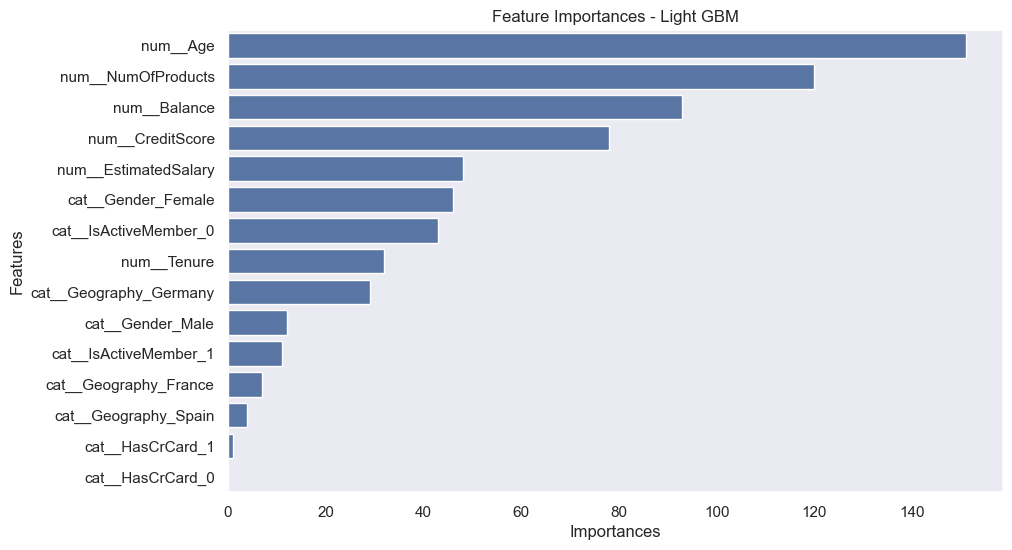

In [63]:
# Agora que temos bons resultados, podemos melhorar ainda mais fazendo a seleção de features

feature_importance = model.feature_importances_

feature_importance_df = pd.DataFrame({
    'Features': feature_names,
    'Importances': feature_importance
    })

feature_importance_df = feature_importance_df.sort_values(by='Importances', ascending=False)
print(feature_importance_df.head(15))

sns.barplot(x='Importances', y='Features', data=feature_importance_df)
plt.title('Feature Importances - Light GBM')
plt.show()

- Podemos notar que há features com importancia muito baixa para nosso modelo, portanto iremos testar nosso modelo, progressivamente sem essas features para encontrar quando teremos aumento ou perda de performance no F1 score quando removemos features com importancia menor que 30

In [94]:
# 1. Selecionar as features mais importantes
# Assumindo que feature_importance_df já foi criado anteriormente
top_features = feature_importance_df[feature_importance_df['Importances'] >= 10]['Features'].tolist()

# 2. Filtrar o dataset para manter apenas as features selecionadas
# Obtém os índices das features selecionadas
feature_indices = [list(feature_names).index(feature) for feature in top_features]

# Filtra X_train_process e X_test_process para manter apenas as features selecionadas
X_train_selected = X_train_process[:, feature_indices]
X_test_selected = X_test_process[:, feature_indices]

# 3. Treinar o modelo com as features selecionadas
# Calcula o scale_pos_weight para balanceamento de classes
scale_pos_weight = (y_train == 0).sum() / (y_train == 1).sum()

# Define o modelo com os melhores hiperparâmetros e balanceamento de classes
model = LGBMClassifier(
    random_state=42,
    verbose=-1,
    scale_pos_weight=scale_pos_weight,  # Balanceamento de classes
    **grid_search.best_params_
)

# Divide os dados de treino em treino e validação para early stopping
X_train_split, X_val, y_train_split, y_val = train_test_split(X_train_selected, y_train, test_size=0.2, random_state=42)

# Treina o modelo com early stopping no conjunto de validação
model.fit(
    X_train_split, y_train_split,
    eval_set=[(X_val, y_val)],  # Usa o conjunto de validação para early stopping
    callbacks=[early_stopping(stopping_rounds=10)]  # Early stopping após 10 rodadas sem melhoria
)

# 4. Avaliar o modelo no conjunto de teste
y_pred = model.predict(X_test_selected)
f1_lgbm_tuned = f1_score(y_test, y_pred)
print(f"\nF1-score com early stopping e features selecionadas: {f1_lgbm_tuned:.4f}")

Training until validation scores don't improve for 10 rounds
Did not meet early stopping. Best iteration is:
[100]	valid_0's binary_logloss: 0.3249

F1-score com early stopping e features selecionadas: 0.7065


### Light GBM - Ensemble com Demais Modelos

In [95]:
# Dessa forma, encontramos o melhor modelo para o nosso problema, com um F1-score de 0.6937 para o conjunto de teste.
# Podemos agora realizar um ensemble e combinar o LightGBM com o Gradient Boosting, que foi o segundo melhor modelo.

# Selecionamos os melhores hiperparametros para cada modelo que encontramos previamente
best_params_LightGBM = {'bagging_fraction': 0.8, 'feature_fraction': 0.9, 'learning_rate': 0.1, 'max_depth': 3, 'min_data_in_leaf': 50, 'n_estimators': 200, 'num_leaves': 31}
lightgbm = LGBMClassifier (random_state=42, **best_params_LightGBM)

best_params_Gradient_Boosting = {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
gradient_boosting = GradientBoostingClassifier(random_state=42, **best_params_Gradient_Boosting)

# Criamos o ensemble
ensemble = VotingClassifier(estimators=[
    ('lightgbm', lightgbm),
    ('gradient_boosting', gradient_boosting)
],
voting = 'soft')

# Treinamos o ensemble
ensemble.fit(X_train_selected, y_train)

# Avaliamos se o ensemble é melhor que os modelos individuais
y_pred = ensemble.predict(X_test_selected)
f1_vote_balanced = f1_score(y_test, y_pred)
print(f"F1-score do Ensemble de voto balanceado: {f1_vote_balanced:.4f}")
print(f"Melhor F1-score para LightGBM tunado: {f1_lgbm_tuned:.4f}")

F1-score do Ensemble de voto balanceado: 0.6996
Melhor F1-score para LightGBM tunado: 0.7065


- Como o ensemble com o Gradient Boosting nao foi melhor do que o LightGBM, vamos usar um modelo linear, que nao seja de arvore tambem

- Dessa forma, poderemos tentar corrigir o que um modelo de arvore esteja errando e o que a regressao logistica esteja errando

In [96]:
# Selecionamos os melhores hiperparametros para cada modelo que encontramos previamente
best_params_LightGBM = {'bagging_fraction': 0.8, 'feature_fraction': 0.9, 'learning_rate': 0.1, 'max_depth': 3, 'min_data_in_leaf': 50, 'n_estimators': 200, 'num_leaves': 31}
lightgbm = LGBMClassifier (random_state=42, **best_params_LightGBM)

best_params_Logistic_Regression = {'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}
logistic_regression = LogisticRegression(random_state=42, **best_params_Logistic_Regression)

# Criamos o ensemble
ensemble = VotingClassifier(estimators=[
    ('lightgbm', lightgbm),
    ('logistic_regression', logistic_regression)
],
voting = 'soft')

# Treinamos o ensemble
ensemble.fit(X_train_selected, y_train)

# Avaliamos se o ensemble é melhor que os modelos individuais
y_pred = ensemble.predict(X_test_selected)
f1_stackd = f1_score(y_test, y_pred)
print(f"F1-score do Ensemble de stacking simples: {f1_stackd:.4f}")
print(f"F1-score do Ensemble de voto balanceado: {f1_vote_balanced:.4f}")
print(f"Melhor F1-score para LightGBM tunado: {f1_lgbm_tuned:.4f}")

F1-score do Ensemble de stacking simples: 0.6802
F1-score do Ensemble de voto balanceado: 0.6996
Melhor F1-score para LightGBM tunado: 0.7065


- Unir a Regressao Logistica e o Gradient Boosting nao funcionaram quando fazemos ambos modelos com os mesmos pesos e com voting, mas podemos ter mais sorte iterando sobre outras formas de fazer o ensemble, como alterar pesos e usar stacking ao inves de voting

In [97]:
# Dessa forma, encontramos o melhor modelo para o nosso problema, com um F1-score de 0.6937 para o conjunto de teste.
# Podemos agora realizar um ensemble e combinar o LightGBM com o Gradient Boosting, que foi o segundo melhor modelo.

# Selecionamos os melhores hiperparametros para cada modelo que encontramos previamente
best_params_LightGBM = {'bagging_fraction': 0.8, 'feature_fraction': 0.9, 'learning_rate': 0.1, 'max_depth': 3, 'min_data_in_leaf': 50, 'n_estimators': 200, 'num_leaves': 31}
lightgbm = LGBMClassifier (random_state=42, **best_params_LightGBM)

best_params_Gradient_Boosting = {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
gradient_boosting = GradientBoostingClassifier(random_state=42, **best_params_Gradient_Boosting)

# Criamos o ensemble
ensemble = VotingClassifier(estimators=[
    ('lightgbm', lightgbm),
    ('gradient_boosting', gradient_boosting)
    ],
    voting = 'soft',
    weights=[0.2, 0.8] # Damos um pouco mais de peso ao Light GBM, que esta melhor tunado e mais performatico
    )

# Treinamos o ensemble
ensemble.fit(X_train_selected, y_train)

# Avaliamos se o ensemble é melhor que os modelos individuais
y_pred = ensemble.predict(X_test_selected)
f1_vote_unbalanced = f1_score(y_test, y_pred)
print(f"F1-score do Ensemble de voto desabalanceado: {f1_vote_unbalanced:.4f}")
print(f"F1-score do Ensemble de stacking simples: {f1_stackd:.4f}")
print(f"F1-score do Ensemble de voto balanceado: {f1_vote_balanced:.4f}")
print(f"Melhor F1-score para LightGBM tunado: {f1_lgbm_tuned:.4f}")

F1-score do Ensemble de voto desabalanceado: 0.7079
F1-score do Ensemble de stacking simples: 0.6802
F1-score do Ensemble de voto balanceado: 0.6996
Melhor F1-score para LightGBM tunado: 0.7065


- Parece que encontramos uma forma de melhorar o desempenho de nosso ensemble, ao dar mais peso ao Gradient Boosting

In [98]:
# Define os modelos base
base_models = [
    ('lightgbm', lightgbm),
    ('gradient_boosting', gradient_boosting)
]

# Define o meta-modelo
meta_model = LogisticRegression(random_state=42, **best_params_Logistic_Regression)

# Cria o ensemble com Stacking
stacking_ensemble = StackingClassifier(estimators=base_models, final_estimator=meta_model)

# Treina o ensemble
stacking_ensemble.fit(X_train_selected, y_train)

# Avalia o ensemble
y_pred = stacking_ensemble.predict(X_test_selected)
f1_meta_balanced = f1_score(y_test, y_pred)
print(f"F1-score do Meta Ensemble com voto balanceado: {f1_meta_balanced:.4f}")
print(f"F1-score do Ensemble de voto desabalanceado: {f1_vote_unbalanced:.4f}")
print(f"F1-score do Ensemble de stacking simples: {f1_stackd:.4f}")
print(f"F1-score do Ensemble de voto balanceado: {f1_vote_balanced:.4f}")
print(f"Melhor F1-score para LightGBM tunado: {f1_lgbm_tuned:.4f}")

F1-score do Meta Ensemble com voto balanceado: 0.6982
F1-score do Ensemble de voto desabalanceado: 0.7079
F1-score do Ensemble de stacking simples: 0.6802
F1-score do Ensemble de voto balanceado: 0.6996
Melhor F1-score para LightGBM tunado: 0.7065


- Embora os resultados nao sejam tao grandes quanto aumentar o peso do Gradient Boosting, usar Stacking com o modelo de Regressao Logistica melhora o desempenho do modelo

- Porem isso abre portas para fazermos um segundo nivel de stacking, usando os modelos de pesos desbalanceados e o stacking com o Logistic Regression (meta-modelo)

- Isso se chama Meta-Ensemble, que consiste em realizar uma validação cruzada para gerar as previsões dos modelos base, que são então usadas como features para treinar o meta-modelo

In [99]:
# Define o VotingClassifier
voting_ensemble = VotingClassifier(
    estimators=[
        ('lightgbm', LGBMClassifier(random_state=42, **best_params_LightGBM)),
        ('gradient_boosting', GradientBoostingClassifier(random_state=42, **best_params_Gradient_Boosting))
    ],
    voting='soft',
    weights=[0.2, 0.8]  # LightGBM tem peso 0.2, Gradient Boosting 0.8
)

# Define o StackingClassifier
stacking_ensemble = StackingClassifier(
    estimators=[
        ('lightgbm', LGBMClassifier(random_state=42, **best_params_LightGBM)),
        ('gradient_boosting', GradientBoostingClassifier(random_state=42, **best_params_Gradient_Boosting)),
        ('logistic_regression', LogisticRegression(random_state=42, **best_params_Logistic_Regression))
    ],
    final_estimator=LogisticRegression(random_state=42, max_iter=1000)
)

# Cria o meta-ensemble que combina Voting e Stacking
meta_ensemble = StackingClassifier(
    estimators=[
        ('voting', voting_ensemble),
        ('stacking', stacking_ensemble)
    ],
    final_estimator=LogisticRegression(random_state=42, max_iter=1000)
)

# Treina o meta-ensemble
meta_ensemble.fit(X_train_selected, y_train)

# Avalia o meta-ensemble
y_pred = meta_ensemble.predict(X_test_selected)
f1_meta_unbalanced = f1_score(y_test, y_pred)
print(f"F1-score do Meta Ensemble com voto desbalanceado: {f1_meta_unbalanced:.4f}")
print(f"F1-score do Meta Ensemble com voto balanceado: {f1_meta_balanced:.4f}")
print(f"F1-score do Ensemble de voto desabalanceado: {f1_vote_unbalanced:.4f}")
print(f"F1-score do Ensemble de stacking simples: {f1_stackd:.4f}")
print(f"F1-score do Ensemble de voto balanceado: {f1_vote_balanced:.4f}")
print(f"Melhor F1-score para LightGBM tunado: {f1_lgbm_tuned:.4f}")

F1-score do Meta Ensemble com voto desbalanceado: 0.7030
F1-score do Meta Ensemble com voto balanceado: 0.6982
F1-score do Ensemble de voto desabalanceado: 0.7079
F1-score do Ensemble de stacking simples: 0.6802
F1-score do Ensemble de voto balanceado: 0.6996
Melhor F1-score para LightGBM tunado: 0.7065


- Dessa forma, os melhores resultados vieram do Voting Ensemble, que combinou Gradient Boosting (peso 0.8) e Light GBM (peso 0.2)

- Porém, ainda há uma estratégia que pode trazer resultados é o Blending.

- A principal diferenca entre Blenidng e Meta Ensemble é que Blending Ensemble utiliza um conjunto de treinamento separado para treinar o modelo meta, enquanto o Meta Ensemble (ou Stacking) usa validação cruzada para gerar previsões dos modelos base e treinar o meta-modelo, evitando vazamento de dados.

In [100]:
# Blending Ensemble:
# Divide o conjunto de treino em duas partes
X_train_base, X_train_meta, y_train_base, y_train_meta = train_test_split(
    X_train_selected, y_train, test_size=0.5, random_state=42
)

# Define os modelos base com os melhores hiperparâmetros
lightgbm = LGBMClassifier(random_state=42, **best_params_LightGBM)
gradient_boosting = GradientBoostingClassifier(random_state=42, **best_params_Gradient_Boosting)
logistic_regression = LogisticRegression(random_state=42, **best_params_Logistic_Regression)

# Treina os modelos base na primeira parte do conjunto de treino
lightgbm.fit(X_train_base, y_train_base)
gradient_boosting.fit(X_train_base, y_train_base)
logistic_regression.fit(X_train_base, y_train_base)

# Gera as previsões dos modelos base na segunda parte do conjunto de treino
lightgbm_preds = lightgbm.predict_proba(X_train_meta)[:, 1]
gradient_boosting_preds = gradient_boosting.predict_proba(X_train_meta)[:, 1]
logistic_regression_preds = logistic_regression.predict_proba(X_train_meta)[:, 1]

# Cria o conjunto de treino para o meta-modelo
X_train_meta_ensemble = pd.DataFrame({
    'lightgbm': lightgbm_preds,
    'gradient_boosting': gradient_boosting_preds,
    'logistic_regression': logistic_regression_preds
})

# Treina o meta-modelo (Logistic Regression)
meta_model = LogisticRegression(random_state=42, max_iter=1000)
meta_model.fit(X_train_meta_ensemble, y_train_meta)

# Gera as previsões dos modelos base no conjunto de teste
lightgbm_test_preds = lightgbm.predict_proba(X_test_selected)[:, 1]
gradient_boosting_test_preds = gradient_boosting.predict_proba(X_test_selected)[:, 1]
logistic_regression_test_preds = logistic_regression.predict_proba(X_test_selected)[:, 1]

# Cria o conjunto de teste para o meta-modelo
X_test_meta_ensemble = pd.DataFrame({
    'lightgbm': lightgbm_test_preds,
    'gradient_boosting': gradient_boosting_test_preds,
    'logistic_regression': logistic_regression_test_preds
})

# Faz as previsões finais com o meta-modelo
y_pred = meta_model.predict(X_test_meta_ensemble)
f1_bending = f1_score(y_test, y_pred)
print(f"F1-score do Blending Ensemble: {f1:.4f}")
print(f"F1-score do Meta Ensemble com voto desbalanceado: {f1_bending:.4f}")
print(f"F1-score do Meta Ensemble com voto balanceado: {f1_meta_balanced:.4f}")
print(f"F1-score do Ensemble de voto desabalanceado: {f1_vote_unbalanced:.4f}")
print(f"F1-score do Ensemble de stacking simples: {f1_stackd:.4f}")
print(f"F1-score do Ensemble de voto balanceado: {f1_vote_balanced:.4f}")
print(f"Melhor F1-score para LightGBM tunado: {f1_lgbm_tuned:.4f}")

F1-score do Blending Ensemble: 0.6841
F1-score do Meta Ensemble com voto desbalanceado: 0.6990
F1-score do Meta Ensemble com voto balanceado: 0.6982
F1-score do Ensemble de voto desabalanceado: 0.7079
F1-score do Ensemble de stacking simples: 0.6802
F1-score do Ensemble de voto balanceado: 0.6996
Melhor F1-score para LightGBM tunado: 0.7065


In [101]:
X_test_meta_ensemble.head()

lightgbm  gradient_boosting  logistic_regression
0  0.014669           0.015890             0.030213
1  0.038183           0.031971             0.095924
2  0.153484           0.158273             0.165368
3  0.615967           0.662326             0.712416
4  0.540450           0.596186             0.672176

- Ao que tudo indica, a validacao cruzada utilizada no Meta ensemble trouxe resultados melhores na nossa analise, mas dessa forma podemos concluir que o melhor modelo que conseguimos desenvolver é o Voting Ensemble Simples

# 5. Metricas do Modelo Final - LGBoostVote

- Como já identificamos nosso modelo mais potente, finalmente seguiremos com as metricas de avaliacao do modelo

In [102]:
# Retreinamos o modelo final
# Selecionamos os melhores hiperparametros para cada modelo que encontramos previamente
best_params_LightGBM = {'bagging_fraction': 0.8, 'feature_fraction': 0.9, 'learning_rate': 0.1, 'max_depth': 3, 'min_data_in_leaf': 50, 'n_estimators': 200, 'num_leaves': 31}
lightgbm = LGBMClassifier (random_state=42, **best_params_LightGBM)

best_params_Gradient_Boosting = {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
gradient_boosting = GradientBoostingClassifier(random_state=42, **best_params_Gradient_Boosting)

# Criamos o ensemble
LGBoostVote = VotingClassifier(estimators=[
    ('lightgbm', lightgbm),
    ('gradient_boosting', gradient_boosting)
    ],
    voting = 'soft',
    weights=[0.2, 0.8] # Damos um pouco mais de peso ao Light GBM, que esta melhor tunado e mais performatico
    )

# Treinamos o ensemble
LGBoostVote.fit(X_train_selected, y_train)

VotingClassifier(estimators=[('lightgbm',
                              LGBMClassifier(bagging_fraction=0.8,
                                             feature_fraction=0.9, max_depth=3,
                                             min_data_in_leaf=50,
                                             n_estimators=200,
                                             random_state=42)),
                             ('gradient_boosting',
                              GradientBoostingClassifier(random_state=42))],
                 voting='soft', weights=[0.2, 0.8])

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.96      0.94      2163
           1       0.81      0.63      0.71       538

    accuracy                           0.90      2701
   macro avg       0.86      0.80      0.82      2701
weighted avg       0.89      0.90      0.89      2701



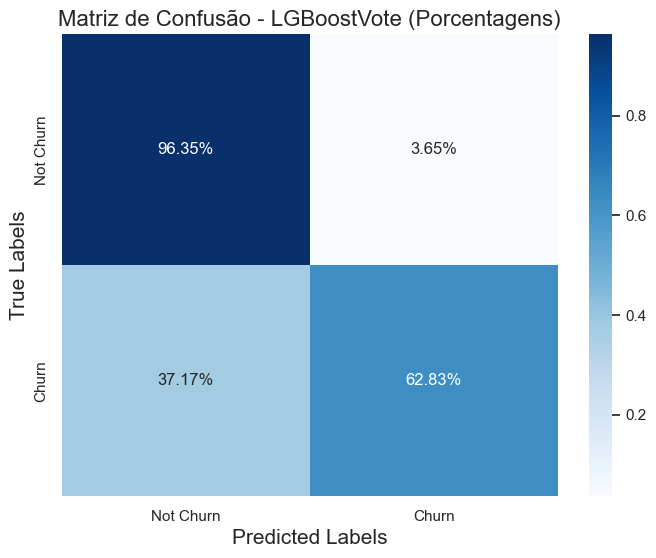

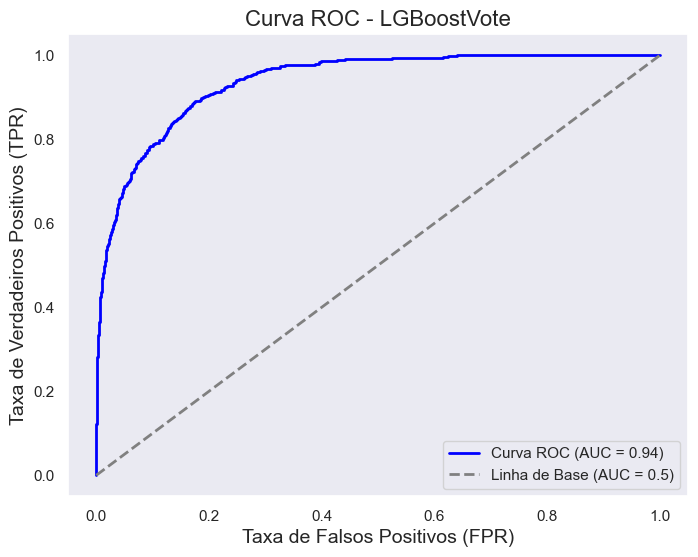

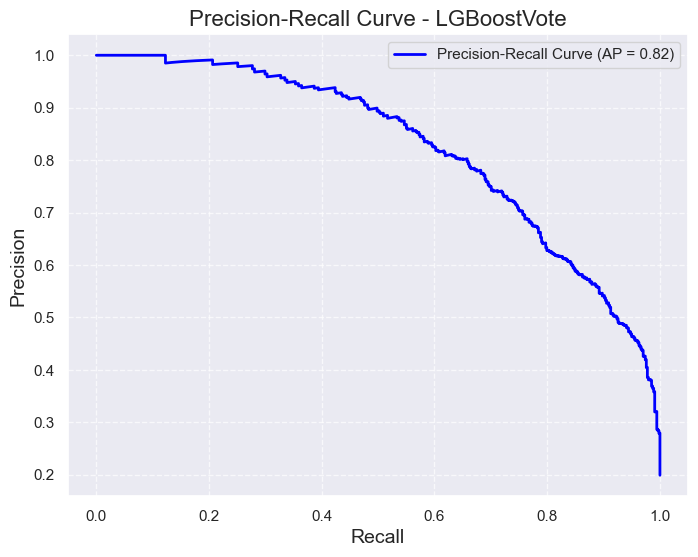

In [109]:
# Fazer previsões no conjunto de teste
y_pred = LGBoostVote.predict(X_test_selected)
y_pred_proba = LGBoostVote.predict_proba(X_test_selected)[:,1]

# 1. Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# 2. Matriz de Confusão
# Calcular a matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)

# Normalizar a matriz de confusão para mostrar porcentagens
conf_matrix_percent = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]

# Plotar a matriz de confusão de forma visualmente atraente
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_percent, annot=True, fmt='.2%', cmap='Blues', 
            xticklabels=['Not Churn', 'Churn'],
            yticklabels=['Not Churn', 'Churn'])
plt.title('Matriz de Confusão - LGBoostVote (Porcentagens)', fontsize=16)
plt.xlabel('Predicted Labels', fontsize = 15)
plt.ylabel('True Labels', fontsize = 15)
plt.show()

# 3. Curva ROC e AUC
# Calcular a curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Plotar a curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'Curva ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2, label='Linha de Base (AUC = 0.5)')
plt.xlabel('Taxa de Falsos Positivos (FPR)', fontsize=14)
plt.ylabel('Taxa de Verdadeiros Positivos (TPR)', fontsize=14)
plt.title('Curva ROC - LGBoostVote', fontsize=16)
plt.legend(loc='lower right')
plt.show()

# 4. Precision-Recall Curve
# Calcular a Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
average_precision = average_precision_score(y_test, y_pred_proba)

# Plotar a Precision-Recall Curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', lw=2, label=f'Precision-Recall Curve (AP = {average_precision:.2f})')
plt.xlabel('Recall', fontsize=14)
plt.ylabel('Precision', fontsize=14)
plt.title('Precision-Recall Curve - LGBoostVote', fontsize=16)
plt.legend(loc='upper right')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

The model results are strong, with room for improvement in identifying churners!

<b>Recall (0.63):</b> The model correctly identifies 63% of the churners. In practical terms, looking at the confusion matrix, it has accurately predicted 339 out of 538 attrited customers. This is the model's most lacking capacity, but we focused mostly in F1-score so it was expected to have lower results in other categories.

<b>Precision (0.81):</b> Out of all customers predicted as churn, 81% of them are actually churners. In practical terms, considering the confusion matrix, out of 418 customers predicted as churn, 339 of them are indeed churners.

<b>ROC-AUC (0.94):</b> With a ROC-AUC score of 0.94, the model demonstrates excellent ability to differentiate between attrited and existing customers. In practice, if we randomly choose a customer that churned and a customer that didn't churn, in 94% of the time the model will estimate a higher probability of churn for that customer who actually attrited.

<b>Average Precision (0.82):</b> The precision-recall balance is strong, with an average precision of 0.82, indicating good performance in identifying churners despite the class imbalance.

The model's high ROC-AUC and precision scores are not due to data leakage, as all features are present at the moment of prediction, and the data was split before training. This performance reflects the quality of the data and the model's ability to leverage meaningful patterns.

The train, test, and validation scores are consistent, indicating reliable generalization ability. However, the recall for churners (63%) suggests an opportunity to improve the model's sensitivity to identify more attrited customers, potentially by adjusting the classification threshold or addressing class imbalance.

# 6. Próximos Passos e Considerações Finais

Para aprimorar o modelo e torná-lo ainda mais útil para o negócio, as seguintes etapas são sugeridas:

- **Melhorar o Recall:** Ajustar o threshold de classificação para priorizar a identificação de mais clientes que podem dar Churn.

- **Implementar técnicas de balanceamento de classes:**, como SMOTE ou Random Oversampling, para lidar com o desbalanceamento do dataset.

- **Explorar Outros Algoritmos:** Testar outros modelos de machine learning, como XGBoost, CatBoost ou redes neurais, para comparar o desempenho.

- **Feature Engineering:** Criar novas features que possam capturar melhor o comportamento dos clientes, como a interação entre produtos contratados e atividade recente.

- **Avaliar o Custo de Erros:** Desenvolver uma métrica customizada que leve em conta os custos reais de falsos positivos e falsos negativos, alinhando o modelo aos objetivos de negócio.

- **Implementar o Modelo em Produção:** Integrar o modelo a um sistema de alertas para que a equipe de retenção possa agir rapidamente com base nas previsões.

- **Coletar Feedback:** Validar os resultados com a equipe de negócios e ajustar o modelo com base no feedback e em novos dados.

**Considerações Finais:** Este projeto demonstra o potencial da ciência de dados para resolver problemas críticos de negócio, como a previsão de Churn. Embora o modelo já apresente resultados promissores, há oportunidades para aprimorá-lo e torná-lo ainda mais impactante. A evolução contínua do projeto permitirá que o banco reduza a rotatividade de clientes e aumente sua receita de forma sustentável.